In [ ]:
STEP - 1 : Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
STEP - 2 :Create the Dataframe

In [33]:
df = pd.read_csv("Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
df.describe(include='all')

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


In [7]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [9]:
df.isnull().value_counts()

name   online_order  book_table  rate   votes  approx_cost(for two people)  listed_in(type)
False  False         False       False  False  False                        False              148
Name: count, dtype: int64

In [11]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [50]:
#convert the data type of column rate to float

def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 0, 'Type of restuarnt')

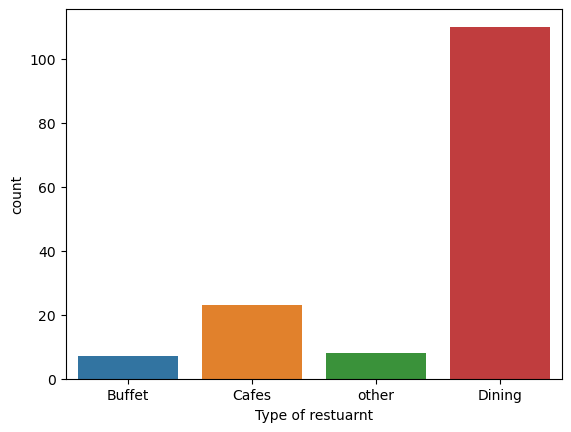

In [51]:
#cretaing countplot for seeing the majority type of restarunt

sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restuarnt")

In [43]:
#how many votes has each type of restaurant received from customer?
#plt.plot(X='listed_in(type)',Y='votes',data = df,c='red')

grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.df({'votes':grouped_data})
plt.plot(result,c='red',marker='o')

AttributeError: module 'pandas' has no attribute 'df'

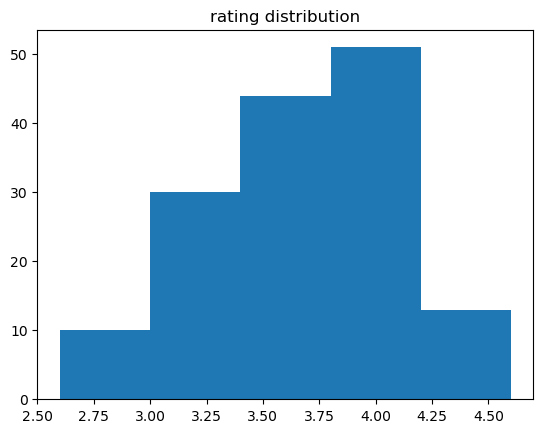

In [53]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

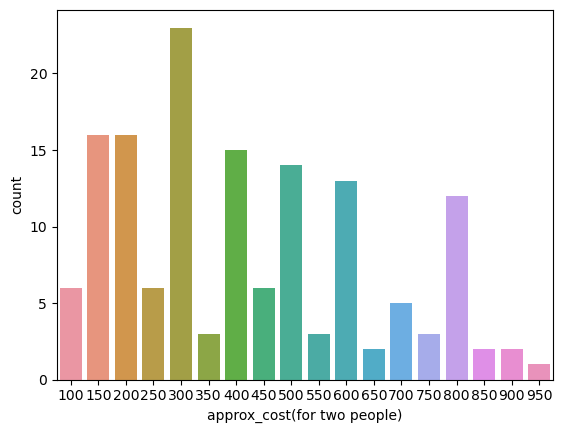

In [54]:
#average order spending by couple 
sns.countplot(x='approx_cost(for two people)',data=df)

In [55]:
#which mode receives maximum rating
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

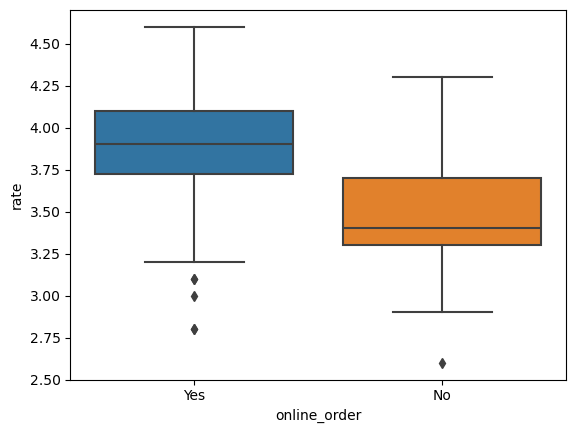

In [56]:
sns.boxplot(x='online_order',y='rate',data=df)

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

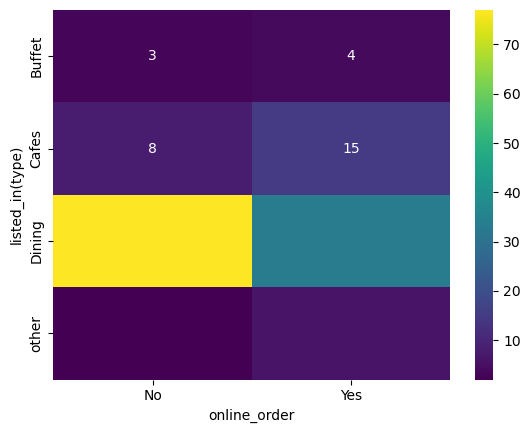

In [60]:
pivot_table=df.pivot_table(index='listed_in(type)',columns ='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='viridis')